# Algorithms 1. Week 1. Reverse sorting.
### Bohdan Tymofieienko, B. S. 
#### btymofieienko@student.fontys.nl
##### 13 Feb 2022

## Table of Contents

* [1. Sorting algorithm](#chapter1)
    * [1.1 Reverse function](#section_1_1)
    * [1.2 Alternative implementation of reverse function](#section_1_2)
    * [1.3 FindMax function](#section_1_3)
    * [1.4 Sorting](#section_1_4)    
* [2. Complexity analysis](#chapter2)
    * [2.1 Assuming reverse is O(1)](#section_2_1)
    * [2.2 Actual complexity](#section_2_2)
        * [2.2.1 Complexity of *reverse(i)*](#section_2_2_1)
        * [2.2.2 Re-evaluation of algorithm complexity](#section_2_2_2)
* [3. Performance measurements](#chapter3)    
* [4. Testing](#chapter4)
    * [4.1 Test strategy](#section_4_1)
    * [4.2 Reverse function tests](#section_4_2)    
    * [4.3 FindMax function tests](#section_4_3)  
    * [4.3 Sorting function tests](#section_4_4) 


## 1. Sorting algorithm <a class="anchor" id="chapter1"></a>

### 1.1 Reverse the list from $S_0$ to $S_n$ <a class="anchor" id="section_1_1"></a>

Slice the list starting at some $i$ and going backwards to $0$. Add the reminder of the list to the result.

In [79]:
def reverse(list, i):
        return list[i::-1] + list[i+1:]

### 1.2 Altertnative implementation of  *reverse* function <a class="anchor" id="section_1_2"></a>

In the previous section function reverse is implemented with the use of so-called slicing. From my own research this is very "pythonic" way of reversing the list. However,to practice more I decided to make this alternative implementation which is more manual in a sense.   

In [80]:
def reverse_(list, until):
        i = 0
        j = until
        while i<j:
            list[i], list[j] = list[j], list[i]
            i+=1
            j-=1
            
        return list

### 1.3 Find the maximum value in the list from from $S_0$ to $S_n$ <a class="anchor" id="section_1_3"></a>

Iterate an array to find the largest element in a given range.
Start at index $0$ and assume the maximum element has an index $0$.
Until given $i$ repeat the following:

<ol>
<li>Compare current element $S[i]$ to $S[MAX]$</li>
<li>If $S[i]$ is larger, then let's assume $S[i]$ is the maximum itself.</li>
<li>Replace the maximum with i.</li>
</ol>


In [81]:
def findMax(list, i):
    maximum = 0
    #Add 1 to i to include i in the range.
    for j in range(0, i+1):
        if list[j] > list[maximum]:
            maximum = j
    return maximum

### 1.3 Sorting algorithm <a class="anchor" id="section_1_3"></a>

By iterating the list backwards we sort the list from element $S_n$ to $S_0$.
Each iteration we repeat the following:

<ol>
<li>Find the index of the MAX value.</li>
<li>Reverse the list until that index. Let's name it 'resulted list'.</li>
<li>Reverse the resulted list so that largest element is now placed 'correctly'.</li>
</ol>

By doing that each iteration we first move the largest element (largest in a **given range**) to the beginning of the list (by reversing the list from $0$ to index of that largest element). And then we simply reverse the whole list again so that the largest element in a certain range is at the end of the list, at it's 'correct place'. Range decreases as we are going backwords and thus elements that are already sorted, meaning those at the end of the list, are not moved anywhere anymore. To avoid creation of auxiliary list result of reverse function that puts the largest element in front is passed to reverse function again to make it the last element.

In [82]:
def sort(list):
    #Subtract 1 from len(list) since len returns a natural number.
    for i in range(len(list)-1, 0, -1):
        max_i = findMax(list,i)
        #Except if element is in 'correct' place already, do the following
        if max_i != i:
            #largest element is now placed 'correctly'.
            list = reverse(reverse(list, max_i),i)
    return list

## 2. Complexity analysis <a class="anchor" id="chapter2"></a>

### 2.1 Assuming reverse is O(1) <a class="anchor" id="section_2_1"></a>

To evalute the complexity of an algorithm we can count the amount of loops. First of all there is a **for** loop to iterate an array. It takes in general $(n - 1)$ iterations to sort the list. Loops can be aproximated as O(n).  Additionally to that, almost each iteration function *reverse* is called. Assuming the complexity *reverse* is $O(1)$ we can ignore it's effect on the time complexity since it is insignificantly small. However since there is another loop in a function *findMax* which can be evaluated as O(n) the result can be computed as following:
$$
  O(n) \times O(n) = O(n^2)
$$

We may approximate it as a worst time complexity, if *reverse* is $O(1)$.

### 2.2 Actual complexity <a class="anchor" id="section_2_2"></a>

#### 2.2.1 Complexity of *reverse(i)* <a class="anchor" id="section_2_2_1"></a>


However evaluating time complexity of *reverse* function it is easy to notice that it's complexity is far from $O(1)$. Since I am using embedded capabilities of python language (slicing), it is complicated to visually evaluate the complexity. For example counting loops method is not working in this case. However, since we know that time complexity of slice operation in Python is $O(k)$, $k$ - parameter passed, we can evaluate complexity of the whole reversing operation as following:
$$
  O(k) + O(n-k) = \\
  O(k + (n - k)) = \\
  O(n + k - k) = \\
  O(n)
$$

Which was fairly obvious since we split the array in two parts $k_1$, $k_2$. One part is reversed and another part is just added to the result. Sizes of those part if added together equals to $n$. Consequently, complexity of *reverse* function is $O(n)$

#### 2.2.2 Re-evaluation of algorithm complexity <a class="anchor" id="section_2_2_2"></a>

As a result we have to re-evaluate the complexity of the whole algorithm. Since there complexity of the *reverse* function is $O(n)$ and it is called almost every iteration time complexity is evaluated as following:
$$
  O(n) \times O(n) = O(n^2)
$$
As was mentioned in the previous paragraph that is the worst time complexity.

## 3. Performance measurements <a class="anchor" id="chapter3"></a>

Let's use %timeit magic command to measure the performance. 

In [83]:
import random

In [84]:
list = [random.random() for i in range(100)]
%timeit sort(list)

418 µs ± 7.49 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [85]:
list = [random.random() for i in range(500)]
%timeit sort(list)

8.61 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
list = [random.random() for i in range(1000)]
%timeit sort(list)

35.7 ms ± 585 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [87]:
list = [random.random() for i in range(5000)]
%timeit sort(list)

900 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
list = [random.random() for i in range(10000)]
%timeit sort(list)

3.83 s ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


To interpret data collected from experiment we can plot with a simple line graph. <br> As you might notice the graph below looks closer to graph of $x^2$ than to any other type of graph (with more data points that would be more obvious). Which gives another intuition on why the complexity of *sort* algorithm is $O(n^2)$. 

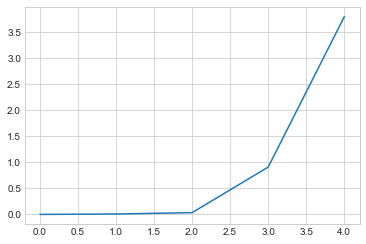

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
y = [0.000408, 0.00843, 0.0343, 0.908, 3.79]

plt.plot(y)
plt.show()

## 4. Unit tests <a class="anchor" id="chapter4"></a>

### 4.1 Test strategy <a class="anchor" id="section_4_1"></a>

<ol>
<li>Empty list, returns empty.</li>
<li>List with one element, returns one same element.</li>
<li>Sorted list, returns sorted list.</li>
<li>List with non-negative numbers, returns sorted list (with same non-negative numbers).</li>  
<li>List with negative numbers, returns sorted list (with same negative numbers).</li>  
<li>List with integer numbers, returns sorted list (with same integer numbers).</li> 
<li>Large integers $x > 10^7$, returns sorted list (with same integer numbers).</li>   
<li>List with large amount of integers $x >= 10^4$, returns sorted list (with same integer numbers).</li>  
</ol>

In [90]:
def isEqual(result, expected):
    return result==expected

### 4.2 Tests for sorting algorithm <a class="anchor" id="section_4_2"></a>

In [91]:
#Test case 1
isEqual(sort([]),[])
#Test case 2
isEqual(sort([1]),[1])
#Test case 3
isEqual(sort([1,2,3]),[1,2,3])
#Test case 4
isEqual(sort([5,1,1,2,0,0]),[5,1,1,2,0,0]) 
#Test case 5
isEqual(sort([-32145,-7,-67,-23,-444]),[-32145,-444,-67,-23,-7])
#Test case 6.1
isEqual(sort([34216,0,-1,1,-1,455,-4217261,99]),[-4217261,-1,-1,0,1,99,455,34216])
#Test case 6.2
isEqual(sort([0,0,0,-9,-99,-5,16,0,0,0]),[-99,-9,-5,0,0,0,0,0,0,16])
#Test case 7
isEqual(sort([3521763,12461120,-42152761,251672174]),[-42152761,3521763,12461120,251672174])
#Test case 8
list = [random.random() for i in range(10000)]
reverseSortRes = sort(list)
list.sort()
isEqual(reverseSortRes,list)

True

### 4.3 Tests for reverse function <a class="anchor" id="section_4_3"></a>

In [92]:
#Test case 1
isEqual(reverse([],0),[])
#Test case 2
isEqual(reverse([1],1),[1])
#Test case 3
isEqual(reverse([1,2,3],2),[3,2,1])
#Test case 4
isEqual(reverse([5,1,1,2,0,0],3),[2,1,1,5,0,0]) 
#Test case 5
isEqual(reverse([-32145,-7,-67,-23,-444],4),[-444,-23,-67,-7,-32145])

True

### 4.4 Tests for findMax function <a class="anchor" id="section_4_4"></a>

In [93]:
#Test case 1
isEqual(findMax([34216,0,-1,1,-1,455,-4217261,99],7),0)
#Test case 2
isEqual(findMax([0,0,0,-9,-99,-5,16,0,0,0],5),1)
#Test case 3
isEqual(findMax([3521763,12461120,-42152761,251672174],2),1)

True